## Importing Libraries:

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture


## Data loading:

In [2]:
# load data
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"C:\Users\sanas\OneDrive\Desktop\DSC630 datasets\marketing_campaign.csv", sep="\t")

In [3]:
# view first few rows of data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# display the shape of data
df.shape

(2240, 29)

In [6]:
# display the columns in the data
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Data Cleaning:

### 1- Check and Handle Missing Data:

In [7]:
# check for null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# replace the null values in the 'Income' column with the Income mean:
mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

### 2- Find and Handle Duplicates:

In [9]:
# check for duplicates
duplicates = df.duplicated().sum()
print("The dataset contains {} duplicates.".format(duplicates))

The dataset contains 0 duplicates.


### 3- Renaming columns:

In [10]:
# Rename the column 'Response' with 'Accepted_Last_Cmp' regarding that it represents the last campaign
df.rename(columns={'Response': 'Accepted_LastCmp'}, inplace=True)

### 4- Create New columns from existing columns:

In [11]:
# create 'Age' column for customers
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [12]:
# create 'Age_Groups' column
## create the function grouping_age.
def grouping_age(Age):
    if Age <= 25:
        return 'Young_Adult'
    elif Age>25 and Age<=45:
        return 'Adult'
    elif Age >45 and Age<=64:
        return 'Middle_Aged'
    else:
        return 'Senior'
# apply the function to the column 'Age'
df['Age_Groups'] = df['Age'].apply(grouping_age)    

In [13]:
# Create one column for 'children' instead of 'Kidhome' and 'Teenhome'
df['Children'] = df['Kidhome'] + df['Teenhome']

In [14]:
# drop the columns 'Kidhome' and 'Teenhome'
df = df.drop (columns = ['Kidhome','Teenhome'], axis=1)

In [15]:
# create the columns 'Total_Spending' and 'Total_AcceptedCmp'

In [16]:
# create the new column "Total Spending"
df['Total_Spending'] = df['MntWines'] + df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts'] + df['MntSweetProducts']+ df['MntGoldProds']

In [17]:
# create the new column 'Total_AcceptedCmp'
df['Total_AcceptedCmp'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['Accepted_LastCmp']

### 5- Replacing Values:

In [18]:
# find the unique values for the column 'Marital_Status'
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
# Replace the values ('Single', 'Divorced', 'Widow', 'Alone') with the value 'No_Partner' and the values ('Together', 'Married') with the value 'With_Partner'
df['Marital_Status'] = df['Marital_Status'].replace ({'Together': 'With_Partner', 'Married': 'With_Partner', 'Divorced':'No_Partner', 'Widow':'No_Partner', 'Alone':'No_Partner', 'Single':'No_Partner'})

The entries 'YOLO' mostly standing for 'You Only Live Once' and 'Absurd' represent 4 entries. They may be listed in the context of jokes. It is not clear and doesn't make sense. So, I prefer to replace them with the most common entry.

In [20]:
# Replace the values 'Absurd' and 'YOLO' by the mode of that column.

In [21]:
# Calculate the mode of 'Marital_Status' column, excluding invalid values
mode_value = df.loc[~df['Marital_Status'].isin(['YOLO', 'Absurd']), 'Marital_Status'].mode()[0]
# replace 'YOLO' and 'Absurd' with mode value
df['Marital_Status'] = df['Marital_Status'].replace({'YOLO': mode_value, 'Absurd':mode_value })


In [22]:
# find unique values of column 'Education':
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [23]:
# replace the value 'Graduation' with 'Graduate', 'PhD' and 'Master' with 'Postgraduate' 
df['Education'] = df['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master':'Postgraduate'})


### 6- Convert the column 'Dt_Customer' to datetime format:

In [24]:
# convert the column 'Dt_Customer' to date format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\sanas\AppData\Local\Temp\ipykernel_82524\3226590174.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


## Data Exploration:

### 1- Descriptive Statistics:

In [25]:
df.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Accepted_LastCmp,Age,Children,Total_Spending,Total_AcceptedCmp
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,56.194196,0.950446,605.798214,0.446875
std,3246.662198,11.984069,25037.797168,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,0.751803,602.249288,0.890543
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,29.000000,0.000000,5.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,48.000000,0.000000,68.750000,0.000000
50%,5458.500000,1970.000000,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,1.000000,396.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,66.000000,1.000000,1045.500000,1.000000
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,132.000000,3.000000,2525.000000,5.000000


- The average age of customers is 56 years old.
- The mean income of customers is 52247 dollars and the average total spending is nearly 606 dollars.
- 75% of customers are paid 68289 dollars or less. 
- The average recency is about 49 days.

### 2- Data Visualization:

In [26]:
# 1- Bar plot for Age groups

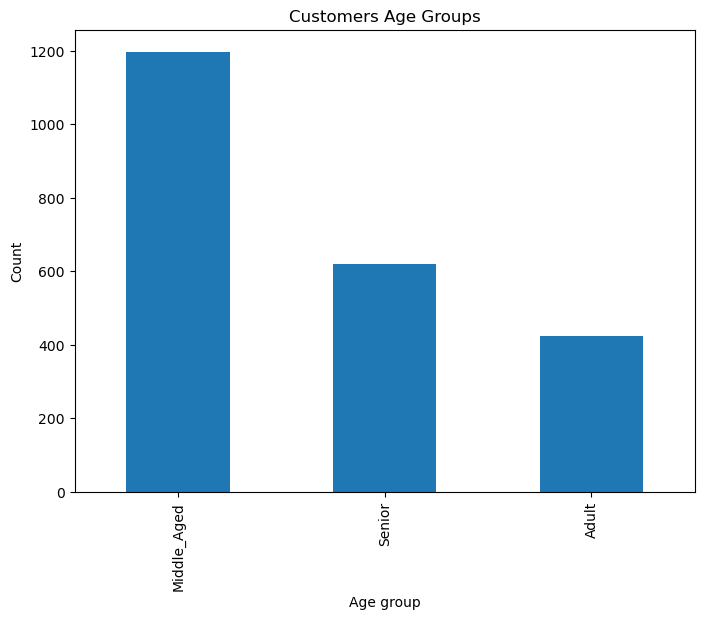

In [27]:
plt.figure(figsize=(8,6))
df['Age_Groups'].value_counts().plot(kind='bar')
plt.title("Customers Age Groups")
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

Most of our customers are middle aged, between 45 and 64 years old. 

In [28]:
# 2- Barplot of customers' Marital Status

In [29]:
# group by marital status and count
maritalStatus_data = df.groupby('Marital_Status')['Marital_Status'].count()
maritalStatus_data

Marital_Status
No_Partner       792
With_Partner    1448
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Customers Marital Status')

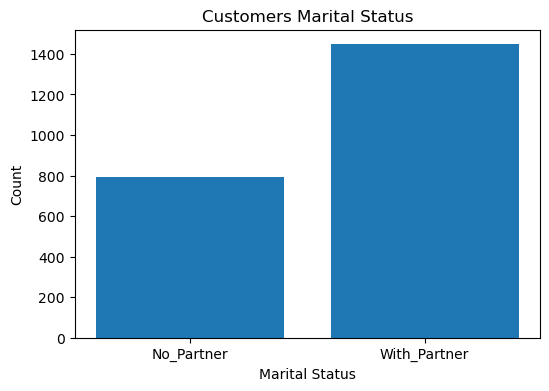

In [30]:
# create plot
plt.figure(figsize=(6,4))
plt.bar(maritalStatus_data.index, maritalStatus_data)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Customers Marital Status')


Customers are often categorized as part of a couple.

In [31]:
## 3- Barplot of customers Education:

In [32]:
# group by Education and count
Education_data = df.groupby('Education')['Education'].count()
Education_data

Education
2n Cycle         203
Basic             54
Graduate        1127
Postgraduate     856
Name: Education, dtype: int64

Text(0.5, 1.0, 'Distribution of Customers Education Levels')

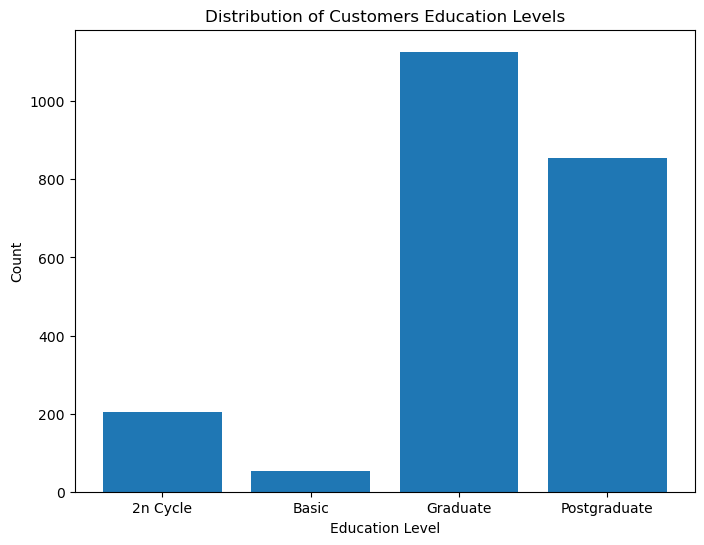

In [33]:
# create plot
plt.figure(figsize=(8,6))
plt.bar(Education_data.index, Education_data.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Customers Education Levels')


Customers have various levels of education. More than 1000 customers stated that they are graduates, about 850 indicated that they are postgraduated while less than 300 customers have basic or second cycle levels of education.

In [34]:
## 4- A Stacked bar chart revealing spending on various products:

In [35]:
# group by marital status and sum the spending in the columns of product categories
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_data = df.groupby('Education')[spending_columns].sum()

In [36]:
spending_data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,40231,5878,28675,9639,6953,9419
Basic,391,600,618,921,654,1233
Graduate,320371,34683,202284,48630,35351,57307
Postgraduate,319823,17756,142391,24867,17663,30650


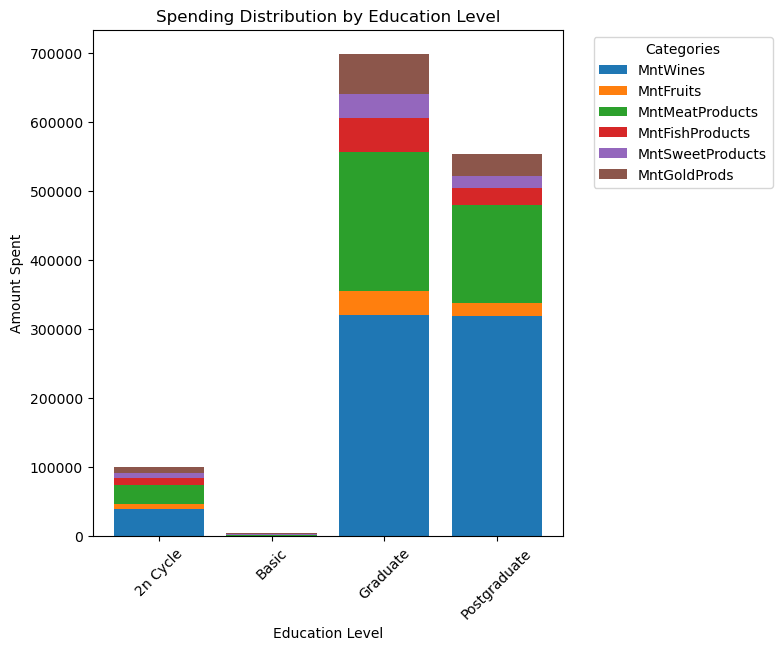

In [37]:
# create plot
plt.figure(figsize=(8,6))
x= np.arange(len(spending_data.index)) # x-axis positions
bottom = np.zeros(len(spending_data.index)) # initialize bottom to zero for stacking
for column in spending_data.columns: # loop through columns for stacking
    plt.bar(x, spending_data[column], bottom=bottom, label=column)
    bottom += spending_data[column]
plt.title('Spending Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Amount Spent')
plt.legend(title='Categories', loc='upper left', bbox_to_anchor = (1.05, 1))
plt.tight_layout()
plt.xticks(x, spending_data.index, rotation=45)
plt.show()

Customers with basic education level are few. We can't interpret their products consumption. However, customers with highest education levels (graduate and postgraduate) are high spenders compared to customers with 2nd cycle, and they spend more in wines and meat products. 

In [38]:
## 5- Correlation matrix on spending columns and purchase channels:

In [39]:
spending_purchaseChannel_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']


In [40]:
# create the correlation matrix
corr_matrix = df[spending_purchaseChannel_columns].corr()

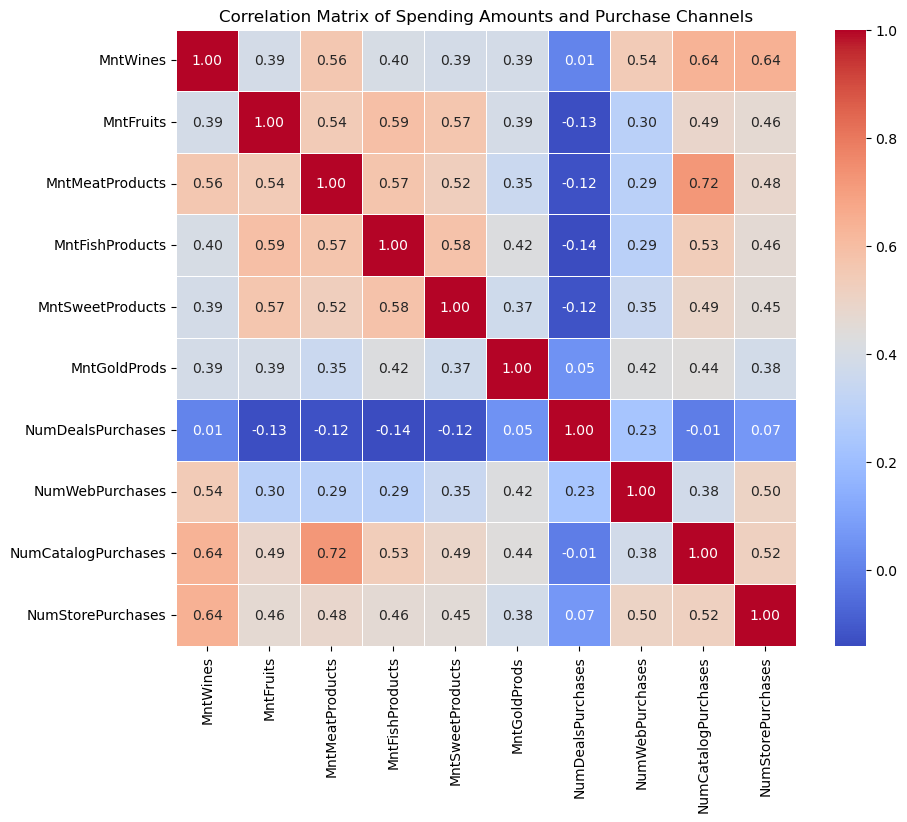

In [41]:
# Plotting
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Spending Amounts and Purchase Channels')
plt.show()

There is a very strong and consistent correlation between the number of store purchases and spending amounts in Wine. Additionally, a correlation coefficient of 0.72 between Amounts of Meat Products and number of Catalog purchases indicates a significant correlation between the two variables.

In [42]:
# 6- Scatter plot Income Vs Total Spending:

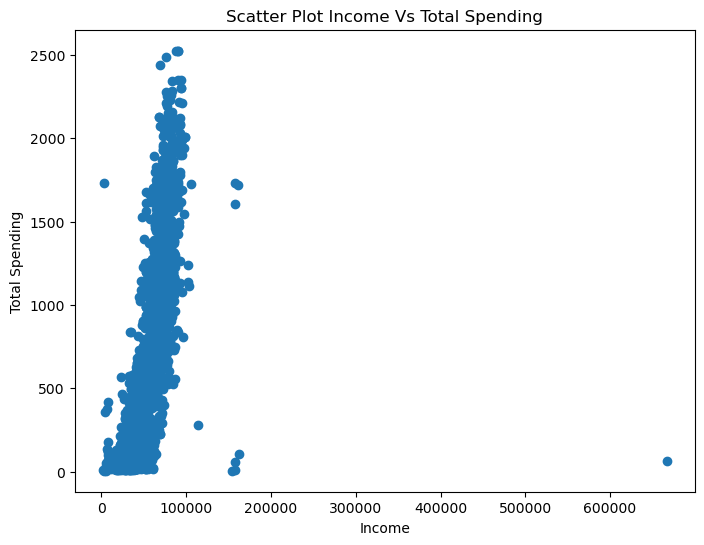

In [43]:
# creating plot
plt.figure(figsize=(8,6))
plt.scatter(df["Income"], df["Total_Spending"])
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.title("Scatter Plot Income Vs Total Spending")
plt.show()

A clear positive correlation exists between Income and Total Spending. This relationship is logical, as higher income levels provide customers with greater financial flexibility to increase their spending. There is extreme values of income (more than 600000) with a very low spending amount, this might indicate outliers.

In [44]:
# 7- A bar plot comparing the number of purchases per Channel:

In [45]:
purchase_channels = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
# group by marital status and compute the number of purchases in each channel
purchaseChannels_data = df.groupby('Marital_Status')[purchase_channels].sum()
# calculate the total number of purchases per channel
total_purchaseChannels_data = purchaseChannels_data.sum() 
total_purchaseChannels_data


NumDealsPurchases       5208
NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
dtype: int64

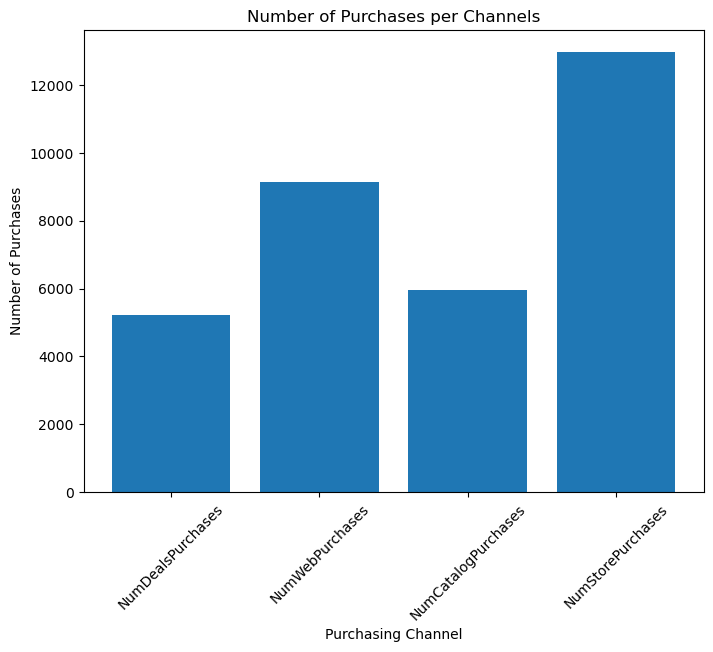

In [46]:
# create bar plot
plt.figure(figsize=(8,6))
plt.bar(total_purchaseChannels_data.index, total_purchaseChannels_data.values)
plt.xlabel("Purchasing Channel")
plt.ylabel("Number of Purchases")
plt.title("Number of Purchases per Channels")
plt.xticks(rotation=45)
plt.show()

Customers predominantly make purchases in person at the store, followed by online transactions, with catalog and deals purchases being the least common.

In [47]:
# 8- A Bar chart showing acceptance rate per Marketing Campaign. 

In [48]:
acceptance_data = df.groupby('Marital_Status')[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Accepted_LastCmp']].mean()
total_acceptance_data = acceptance_data.sum()
total_acceptance_data

AcceptedCmp3        0.148606
AcceptedCmp4        0.150225
AcceptedCmp5        0.142314
AcceptedCmp1        0.126904
AcceptedCmp2        0.027010
Accepted_LastCmp    0.330194
dtype: float64

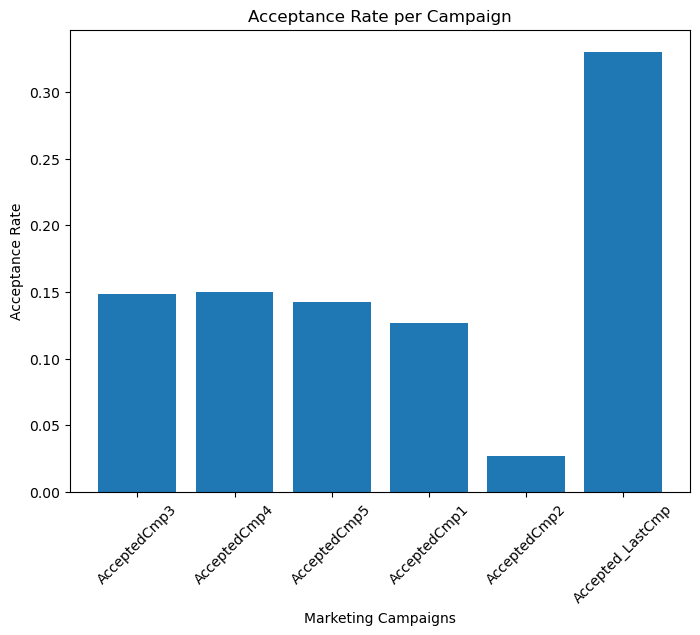

In [49]:
# create bar plot
plt.figure(figsize=(8,6))
plt.bar(total_acceptance_data.index, total_acceptance_data.values)
plt.xlabel("Marketing Campaigns")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate per Campaign")
plt.xticks(rotation=45)
plt.show()

The Top marketing campaigns are notably the last campaign with a rate of 30% , followed by the campaigns 3, 4 and 5 with a rate close to 15%. 

The acceptance rates across different campaigns are relatively similar, except for Campaign 2, which has the lowest acceptance rate and the last campaign which has the highest acceptance rate. This helps stakeholders to optimize their resource allocation effectively.

In [50]:
# 9- Pie Chart illustrating the Distribution of complaints:

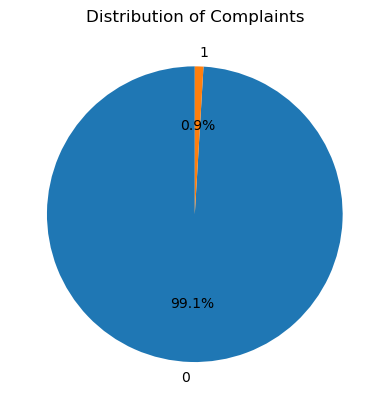

In [51]:
# create pie chart
df['Complain'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Complaints')
plt.ylabel('')
plt.show()

Only about 1% of customers filed complaints. This might indicate their satisfaction.

In [52]:
# 10- A bubble chart showing the relationship among Recency, and total spending, with bubble size representing children numbers.

In [53]:
# bubble chart Total Spending vs Recency with Children number for bubble size :

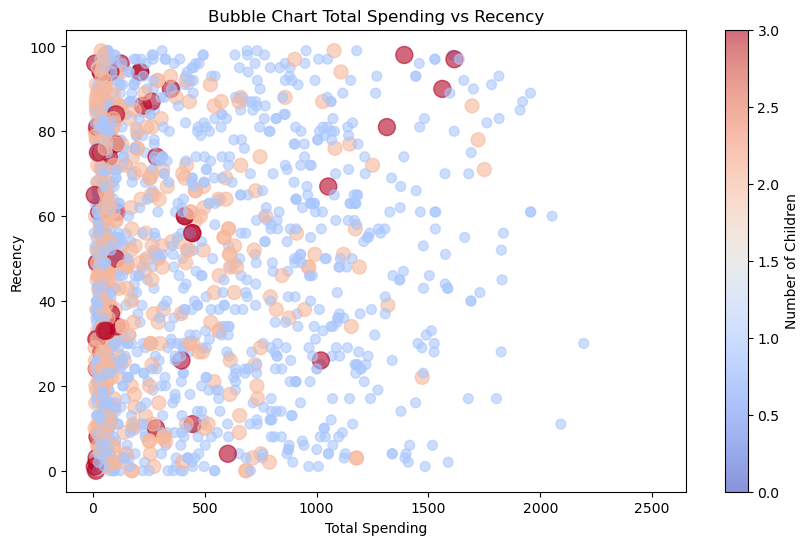

In [54]:
x = df['Total_Spending']  
y = df['Recency'] 
size = (df['Children']* 50)  

# Create Bubble Chart
plt.figure(figsize=(10,6))
plt.scatter(x=x, y=y, s=size, c=df['Children'], alpha=0.6, cmap='coolwarm')
plt.xlabel("Total Spending")
plt.ylabel("Recency")
plt.title("Bubble Chart Total Spending vs Recency")
plt.colorbar(label='Number of Children')
plt.show()

The data points are primarily concentrated at lower spending amounts, regardless of the number of children. While no clear correlation exists between the two variables, it is evident that certain customers are more valuable, exhibiting higher spending levels than others.

## Data preparation for Modeling:

### 1- Deriving new features from existing data.:

In [55]:
# create total 'Spending_from_income' feature:
df['Spending_from_income'] = (df['Total_Spending'] / df['Income']) * 100

In [56]:
# create the features 'Years_Customer'
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)

### 2- Drop useless columns: 

In [57]:
# Drop useless columns: 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', spending columns, acceptance campaign columns, 'Age', 'Complain'
df = df.drop(columns=['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Accepted_LastCmp', 'Age', 'Complain', 'Dt_Customer'], axis=1)

### 3- Finding outliers and Handling them:

In [58]:
# define numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns
categrical_features = df.select_dtypes(include=object).columns

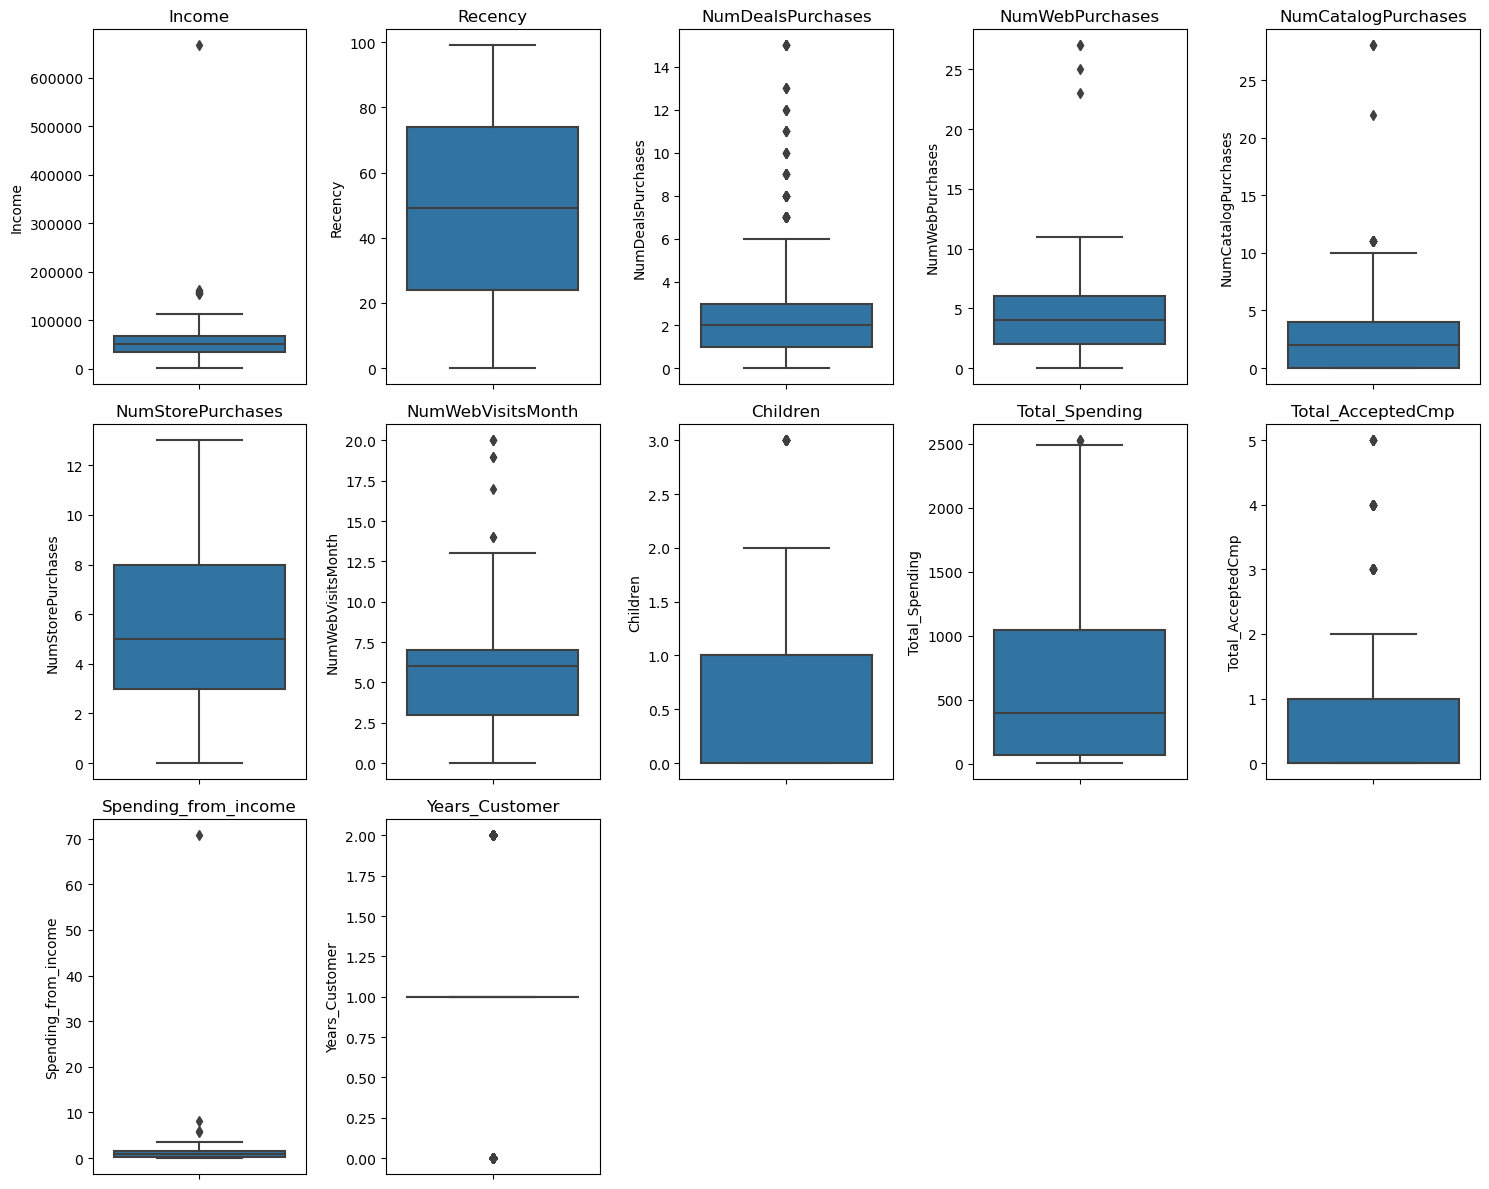

In [59]:
# check for outliers:
# Boxplot Method:
plt.figure(figsize=(15, 12)) 
for i, col in enumerate(numerical_features):
    plt.subplot(3, 5, i + 1)  
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout() 
plt.show()

- For income, An amount more than 600000 seems unrealistic, regarding that the average is less than 100000.
- In addition, The NumDealsPurchases, NumWebPurchases, NumCatalogPurchases have some outliers, indicating that some customers prefer to get more deals purchases and others shop significantly more online.
- The NumWebVisitsMonth has also few outliers indicating that some customers are more engaged than others.
- Finally, Total_Spending and Spending_from_income have clear outliers, suggesting that some customers are big spenders while others tend to spend high proportion of their income.

In [60]:
# Handling outliers:

In [61]:
df[df['Income']>600000]

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age_Groups,Children,Total_Spending,Total_AcceptedCmp,Spending_from_income,Years_Customer
2233,Graduate,With_Partner,666666.0,23,4,3,1,3,6,Middle_Aged,1,62,0,0.0093,1


In [62]:
df[df['Spending_from_income']>30]

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age_Groups,Children,Total_Spending,Total_AcceptedCmp,Spending_from_income,Years_Customer
21,Graduate,With_Partner,2447.0,42,15,0,28,0,1,Middle_Aged,1,1730,0,70.698815,1


This is unrealistic, an income exceeding 600000 dollars witha total spending of 62 dollars during two years. Also, a customer with annual income of 2447 dollars, probably not working, with total spending of 1730 dollars. Probably, these  are errors. Then, I prefer to remove outliers to get better modeling results. 

In [63]:
# function to remove outliers using IQR
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply to numerical features
df = remove_outliers(df, numerical_features)


In [64]:
# reset indexes:
df = df.reset_index(drop=True)

### 4- Computing a Correlation matrix to the remaining columns:

In [65]:
corr_matrix = df.corr()
print(corr_matrix)

                        Income   Recency  NumDealsPurchases  NumWebPurchases  \
Income                1.000000  0.012419          -0.141356         0.538271   
Recency               0.012419  1.000000           0.004098         0.014068   
NumDealsPurchases    -0.141356  0.004098           1.000000         0.305677   
NumWebPurchases       0.538271  0.014068           0.305677         1.000000   
NumCatalogPurchases   0.728866  0.029707          -0.083015         0.484765   
NumStorePurchases     0.699886  0.010001           0.069303         0.558897   
NumWebVisitsMonth    -0.661178 -0.026825           0.357563        -0.041081   
Children             -0.347745  0.002450           0.453462        -0.170538   
Total_Spending        0.825950  0.031944          -0.103049         0.588519   
Total_AcceptedCmp     0.218492 -0.103214          -0.026076         0.199607   
Spending_from_income  0.713704  0.036272           0.025220         0.654196   
Years_Customer       -0.035232  0.014087

C:\Users\sanas\AppData\Local\Temp\ipykernel_82524\3083230406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


There is highly strong correlation between Spending_from_income and Total_Spending, a correlation coefficient of 0.96. So, I will keep one of them. Also, 

In [66]:
# drop the column 'Spending_from_income'
df=df.drop(columns='Spending_from_income', axis=1)

### 5- Apply One Hot Encoding to categorical data:

In [67]:
# Apply ordinal encoding for categorical data
df = pd.get_dummies(df, columns=["Education", "Marital_Status", "Age_Groups"], drop_first=True)

### 6- Data Scaling:

In [68]:
# define the key features
key_features = numerical_features.drop('Spending_from_income', 'Recency',  )

In [69]:
# apply min max scaler to the data
scaler = MinMaxScaler()
df[key_features] = scaler.fit_transform(df[key_features])

In [70]:
# check the scaling done
df.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,Total_Spending,Total_AcceptedCmp,Years_Customer,Education_Basic,Education_Graduate,Education_Postgraduate,Marital_Status_With_Partner,Age_Groups_Middle_Aged,Age_Groups_Senior
0,0.565228,0.585859,0.500000,0.727273,1.0,0.307692,0.538462,0.0,0.686300,0.5,1.0,0,1,0,0,0,1
1,0.439051,0.383838,0.333333,0.090909,0.1,0.153846,0.384615,1.0,0.007682,0.0,0.0,0,1,0,0,0,1
2,0.709389,0.262626,0.166667,0.727273,0.2,0.769231,0.307692,0.0,0.327358,0.0,0.5,0,1,0,1,1,0
3,0.228314,0.262626,0.333333,0.181818,0.0,0.307692,0.461538,0.5,0.018779,0.0,0.0,0,1,0,1,0,0
4,0.566886,0.949495,0.833333,0.454545,0.3,0.461538,0.384615,0.5,0.176270,0.0,0.0,0,0,1,1,0,0


### 7- Select the features with more than 5% variance:

In [71]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold 
selector = VarianceThreshold(threshold=0.05)  

# Apply the transformation
df_reduced = selector.fit_transform(df)

# Get the selected feature names
selected_features = df.columns[selector.get_support()]

# Convert back to DataFrame
df = pd.DataFrame(df_reduced, columns=selected_features)

print("Remaining features:", list(df.columns))

Remaining features: ['Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Children', 'Total_Spending', 'Total_AcceptedCmp', 'Years_Customer', 'Education_Graduate', 'Education_Postgraduate', 'Marital_Status_With_Partner', 'Age_Groups_Middle_Aged', 'Age_Groups_Senior']


### 8- Applying PCA to Scaled data:

In [72]:
# Apply PCA to our scaled data to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])


In [73]:
df_pca.head()

,PCA1,PCA2
0,0.475003,-1.170120
1,0.516409,-0.742863
2,0.652470,0.309873
3,0.614863,-0.200139
4,-0.792464,-0.092190


## Data Modeling: 

### 1-Implementing K_Means model:

In [74]:
# determine the optimal number of clusters using silhouette score method
silhouette_scores = []
k_values = range(2,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, cluster_labels))

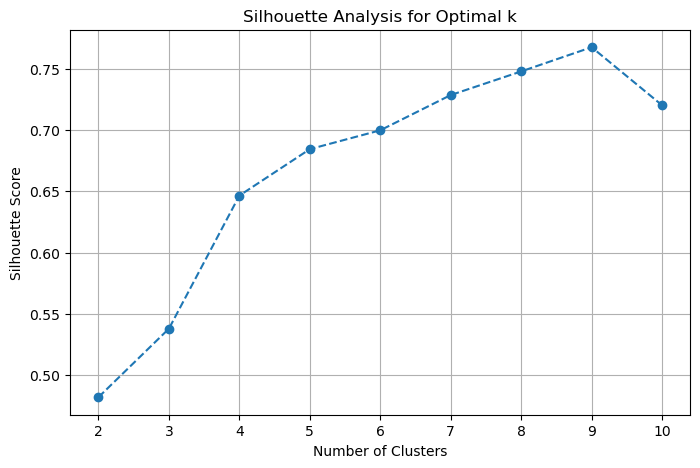

In [75]:
# plot silhouette scores
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid()
plt.show()

In [76]:
# Choose the optimal number of clusters
best_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {best_k}')

Optimal number of clusters: 9


In [77]:
# Final K_Means Model
kmeans = KMeans(n_clusters = 9, random_state=42, n_init = 10)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

In [78]:
print(df_pca['Cluster'].unique())
print(df_pca['Cluster'].value_counts())

[3 0 7 8 2 5 4 1 6]
0    532
2    415
3    259
4    236
7    207
5    116
8     97
1     79
6     46
Name: Cluster, dtype: int64


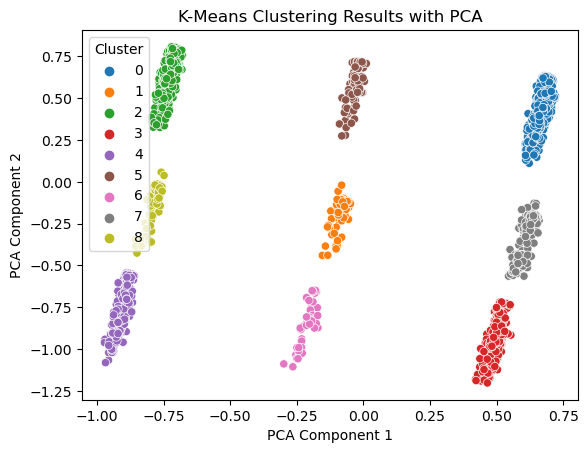

In [79]:
# Visualize Clusters
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df_pca['Cluster'], palette='tab10')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results with PCA')
plt.show()

In [80]:
# Evaluate the model
silhouette_avg = silhouette_score(df_pca.drop(columns=['Cluster']), df_pca['Cluster'])
print(f'Silhouette Score for K-Means with PCA: {silhouette_avg:.4f}')

Silhouette Score for K-Means with PCA: 0.7676


The silhouette score is for the K_Means model is about to 0.77. That means that the model is strong and well-formed. The clusters are separated and well compacted. 

### 2- Hierarchical Clustering:

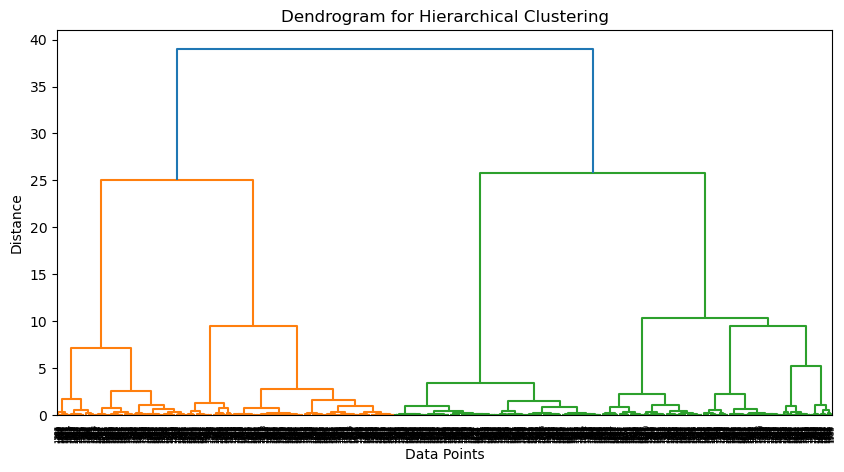

In [81]:
# Plot Dendrogram to determine the number of clusters
plt.figure(figsize=(10, 5))
linkage_matrix = sch.linkage(df_pca[['PCA1', 'PCA2']], method='ward')
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

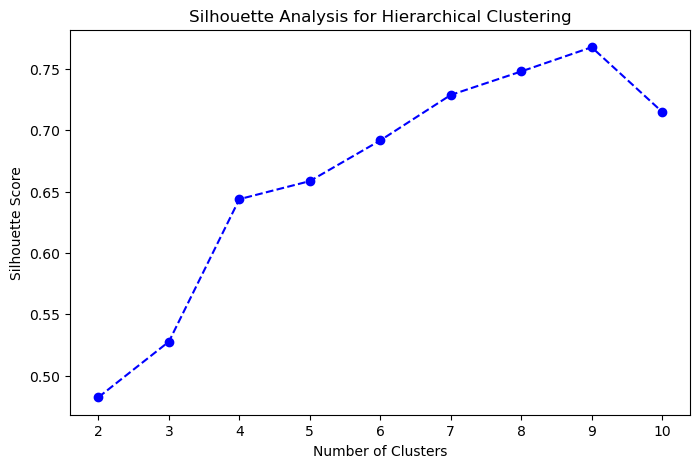

Optimal number of clusters: 9


In [82]:
# Try different numbers of clusters (k) based on dendrogram
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = hc.fit_predict(df_pca[['PCA1', 'PCA2']])
    silhouette_scores.append(silhouette_score(df_pca[['PCA1', 'PCA2']], cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Hierarchical Clustering')
plt.show()

# Choose the best k (highest silhouette score)
best_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {best_k}')



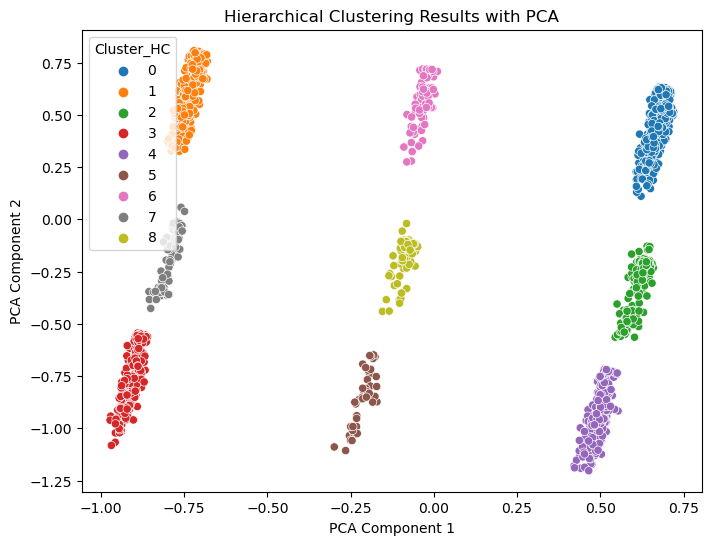

In [83]:
# Fit Hierarchical Clustering with optimal k
hc = AgglomerativeClustering(n_clusters=9, linkage='ward')
df_pca['Cluster_HC'] = hc.fit_predict(df_pca[['PCA1', 'PCA2']])

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df_pca['Cluster_HC'], palette='tab10')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering Results with PCA')
plt.show()



In [84]:
# Evaluate silhouette score
silhouette_hc = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['Cluster_HC'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc:.4f}')

Silhouette Score for Hierarchical Clustering: 0.7676


## Comparing Models:

In [85]:
# print the different silhouette scores
print("Silhouette Score for K-Means: ", silhouette_avg)
print("Silhouette Score for Hierarchical Clustering: ",silhouette_hc)

Silhouette Score for K-Means:  0.7675605161216353
Silhouette Score for Hierarchical Clustering:  0.7675605161216353


According to the silhouette scores values and to the previous clustering results visualizations, K-Means and Hierarchical Clustering models are two great models which are performing pretty well on the data.

In the clusters visualization, each color represents a different cluster.
Clusters appear well packed, which may indicate similarity within the group.

## K-Means Clusters Interpretation:

In [86]:
df_analysis = df.copy()
df_analysis['Cluster'] = df_pca['Cluster']

# Compute mean values for each cluster
cluster_summary = df_analysis.groupby('Cluster').mean()
print(cluster_summary)


          Recency  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                                      
0        0.513879           0.372807         0.368079             0.238158   
1        0.475770           0.327004         0.258918             0.132911   
2        0.480005           0.380723         0.369551             0.234458   
3        0.507157           0.364865         0.397332             0.298842   
4        0.492809           0.360169         0.412173             0.322034   
5        0.491728           0.347701         0.260972             0.142241   
6        0.494730           0.304348         0.389328             0.304348   
7        0.494413           0.285829         0.303030             0.208696   
8        0.494221           0.268041         0.325211             0.227835   

         NumStorePurchases  Children  Total_Spending  Total_AcceptedCmp  \
Cluster                                                           

In [87]:
# create a heatmap to see the most important features in each cluster

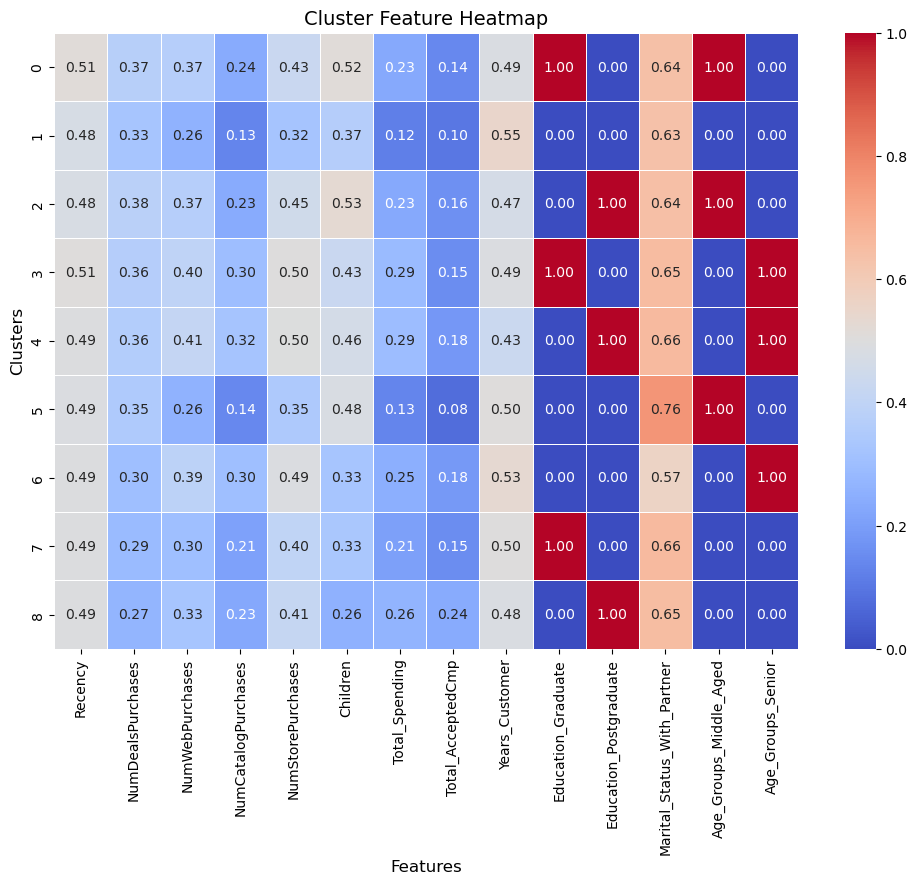

In [88]:
# Create the heatmap to see the most important features in each cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Cluster Feature Heatmap", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.show()

For clusters 5, the feature 'Marital_Status_With_Partner' is significantly important. This feature is also important in explaining the clusters 0, 1, 2, 3, 4, 7 and 8. 

In [75]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
## Clusters Interpretation:

## Cluster 0: Middle-Aged, graduate, Highly Engaged Customers
- Demographics: Mostly middle-aged, graduate education, and married/with partner.
- Purchasing Behavior: Moderate store and web purchases, but lower catalog purchases.
- Engagement: Moderate total spending, with some campaign acceptance.
- Years as a Customer: Around the average.

This is a stable customer segment that prefers in-store and online purchases but is moderately responsive to promotions.

## Cluster 1: Younger, with low education, Low-Spending Customers
- Demographics: Likely younger, with lower education levels.
- Purchasing Behavior: Fewer purchases across all channels.
- Engagement: Low total spending and low campaign acceptance.
- Years as a Customer: Higher than average.

These customers have been around for a while but do not spend much. They may need better engagement strategies or promotions.

## Cluster 2: Middle-Aged, Postgraduate, High Engagement
- Demographics: Mostly middle-aged, postgraduates, and married/with partner.
- Purchasing Behavior: Moderate-to-high store and web purchases.
- Engagement: Higher campaign acceptance and higher total spending.
- Years as a Customer: Slightly lower than average.

This is a valuable customer group that is willing to spend and engage with promotions.

## Cluster 3: Senior, Highly Engaged, High Spenders
- Demographics: Mostly seniors, graduates, and married/with partner.
- Purchasing Behavior: High store and catalog purchases.
- Engagement: High total spending, frequent campaign acceptance.
- Years as a Customer: Close to average.

These are older, loyal customers who actively engage with campaigns and make frequent purchases.

## Cluster 4: Senior, High-Spending Catalog Buyers
- Demographics: Mostly seniors, postgraduates, and married/with partner.
- Purchasing Behavior: Higher catalog and store purchases.
- Engagement: High total spending, more responsive to promotions.
- Years as a Customer: Lower than average.

This group of customers rely on catalog purchases and are highly valuable but require tailored engagement.

## Cluster 5: Middle-Aged, Moderately Engaged, Married Customers
- Demographics: Mostly middle-aged, married, and with graduate education.
- Purchasing Behavior: Moderate spending and fewer purchases across all channels.
- Engagement: Low campaign acceptance.
- Years as a Customer: Higher than average.

Long-term customers who do not respond much to promotions. They may need personalized engagement.

## Cluster 6: Senior, Moderate Spending, Low Campaign Response
- Demographics: Mostly senior customers with lower levels of education.
- Purchasing Behavior: More store and web purchases, but low catalog purchases.
- Engagement: Low total spending, low campaign acceptance.
- Years as a Customer: High.

Older, long-time customers who do not engage with promotions but make regular purchases.

## Cluster 7: Younger, highly educated, Low Spending, Disengaged
- Demographics: Mostly young, graduates, and married.
- Purchasing Behavior: Low purchases across all channels.
- Engagement: Low spending, low campaign acceptance.
- Years as a Customer: Close to average.

A disengaged segment that requires a strong incentive to increase spending.

## Cluster 8: High-Spending, Postgraduate Customers
- Demographics: Mostly postgraduates, with diverse age groups.
- Purchasing Behavior: High total spending and higher campaign acceptance.
- Engagement: Very engaged and responsive to promotions.
- Years as a Customer: Average.

A high-value customer segment that should be retained with exclusive offers and VIP programs.
